In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np                     
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data=pd.read_csv('Sales_add.csv')
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


# 1.Testing for increase in sales

In [6]:
stats.ttest_rel(data['Sales_After_digital_add(in $)'], data['Sales_before_digital_add(in $)'],alternative='greater')

Ttest_relResult(statistic=12.09070525287017, pvalue=3.168333502287889e-11)

In [8]:
datav={'Digital_Add':['before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after'],'Sales':[132921,149559,146278,152167,159525,137163,130625,131140,171259,141956,159339,178939,145062,151514,147463,177195,140862,167996,132135,152493,147425,130263,270390,223334,244243,231808,258402,256948,222106,230637,226261,193735,203175,276279,205180,253131,229336,187305,234908,191517,227040,212579,263388,243020]}
datav=pd.DataFrame(datav)
datav.head()

,Digital_Add,Sales
0,before,132921
1,before,149559
2,before,146278
3,before,152167
4,before,159525


<AxesSubplot:xlabel='Digital_Add', ylabel='Sales'>

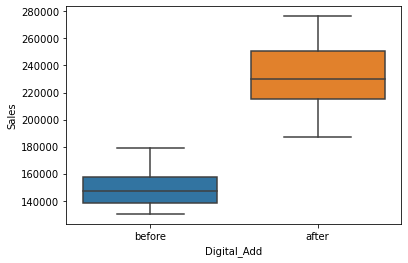

In [9]:
sns.boxplot(x='Digital_Add',y='Sales',data=datav)

# 2.Testing for dependency in features

In [15]:
import scipy
Table_chi=scipy.stats.chi2.ppf(1-.05, df=4) # Finding Table value of chi-square
Table_chi

9.487729036781154

<AxesSubplot:xlabel='Manager', ylabel='count'>

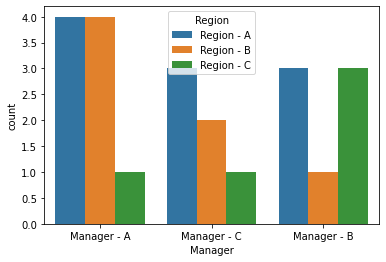

In [16]:
sns.countplot(x='Manager',hue='Region',data=data)